In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
W = np.array([
    [3, 0],  
    [5, 1]  
])

In [44]:
def alex(round_num, prev_opponent):
    return 1

def bob(round_num, prev_opponent):
    return 0

def clara(round_num, prev_opponent):
    return 0 if prev_opponent is None else prev_opponent

def denis(round_num, prev_opponent):
    return 0 if prev_opponent is None else 1 - prev_opponent

def emma(round_num, prev_opponent):
    return 1 if (round_num + 1) % 20 == 0 else 0

def frida(round_num, opponent_history):
    if opponent_history is None or len(opponent_history) == 0:
        return 0
    if all(x == 0 for x in opponent_history):
        return 0
    return 1

def george(round_num, opponent_history):
    if round_num < 2 or opponent_history is None or len(opponent_history) < 2:
        return 0
    return opponent_history[-2]


In [45]:
def play_game(strat_A, strat_B, rounds=200):
    history_A, history_B = [], []
    scores_A, scores_B = 0, 0
    dom_series, max_dom_series = 0, 0

    for round_num in range(rounds):
        if strat_A in [frida, george]:
            arg_A = history_B.copy()
        else:
            arg_A = history_B[-1] if history_B else None

        if strat_B in [frida, george]:
            arg_B = history_A.copy()
        else:
            arg_B = history_A[-1] if history_A else None

        move_A = strat_A(round_num, arg_A)
        move_B = strat_B(round_num, arg_B)

        history_A.append(move_A)
        history_B.append(move_B)

        gain_A = W[move_A][move_B]
        gain_B = W[move_B][move_A]
        scores_A += gain_A
        scores_B += gain_B

        if (gain_A == 5 and gain_B == 0) or (gain_B == 5 and gain_A == 0):
            dom_series += 1
            max_dom_series = max(max_dom_series, dom_series)
        else:
            dom_series = 0

    return scores_A, scores_B, max_dom_series


In [46]:
strategies = {
    "Alex": alex,
    "Bob": bob,
    "Clara": clara,
    "Denis": denis,
    "Emma": emma,
    "Frida": frida,
    "George": george
}

results = []

for name_A, strat_A in strategies.items():
    for name_B, strat_B in strategies.items():
        if name_A == name_B:
            continue
        score_A, score_B, dom_len = play_game(strat_A, strat_B)
        results.append({
            "Strategy_A": name_A,
            "Strategy_B": name_B,
            "A_Score": score_A,
            "B_Score": score_B,
            "Max_Dom_Series": dom_len
        })

df = pd.DataFrame(results)
print(f"Общее количество матчей: {len(results)}")
df.head()


Общее количество матчей: 42


,Strategy_A,Strategy_B,A_Score,B_Score,Max_Dom_Series
0,Alex,Bob,1000,0,200
1,Alex,Clara,204,199,1
2,Alex,Denis,1000,0,200
3,Alex,Emma,960,10,19
4,Alex,Frida,204,199,1


In [47]:
df_scores = df.pivot(index="Strategy_A", columns="Strategy_B", values="A_Score")
print("Таблица общих очков (строка против столбца):")
print(df_scores)


Таблица общих очков (строка против столбца):
Strategy_B   Alex     Bob  Clara   Denis   Emma  Frida  George
Strategy_A                                                    
Alex          NaN  1000.0  204.0  1000.0  960.0  204.0   208.0
Bob           0.0     NaN  600.0     3.0  570.0  600.0   600.0
Clara       199.0   600.0    NaN   450.0  588.0  600.0   600.0
Denis         0.0   998.0  450.0     NaN  940.0    9.0   470.0
Emma         10.0   620.0  593.0    40.0    NaN   71.0   593.0
Frida       199.0   600.0  600.0   989.0  921.0    NaN   600.0
George      198.0   600.0  600.0   465.0  588.0  600.0     NaN


In [48]:
df_dominance = df.pivot(index="Strategy_A", columns="Strategy_B", values="Max_Dom_Series")
print("Таблица максимальной длины доминирующей серии:")
print(df_dominance)


Таблица максимальной длины доминирующей серии:
Strategy_B   Alex    Bob  Clara  Denis  Emma  Frida  George
Strategy_A                                                 
Alex          NaN  200.0    1.0  200.0  19.0    1.0     2.0
Bob         200.0    NaN    0.0  199.0   1.0    0.0     0.0
Clara         1.0    0.0    NaN    1.0   2.0    0.0     0.0
Denis       200.0  199.0    1.0    NaN  18.0  197.0     2.0
Emma         19.0    1.0    2.0   18.0   NaN   20.0     1.0
Frida         1.0    0.0    0.0  197.0  20.0    NaN     0.0
George        2.0    0.0    0.0    2.0   1.0    0.0     NaN


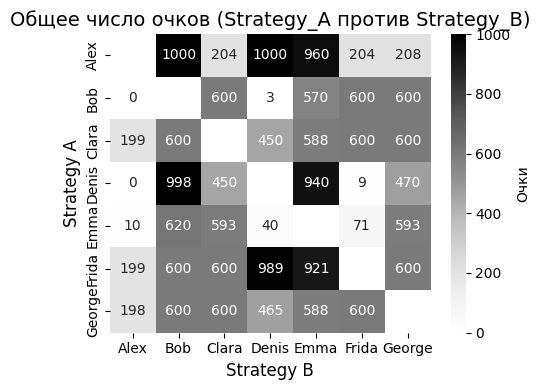

In [49]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_scores, annot=True, fmt=".0f", cmap="Greys", cbar_kws={'label': 'Очки'})
plt.title("Общее число очков (Strategy_A против Strategy_B)", fontsize=14)
plt.xlabel("Strategy B", fontsize=12)
plt.ylabel("Strategy A", fontsize=12)
plt.tight_layout()
plt.show()


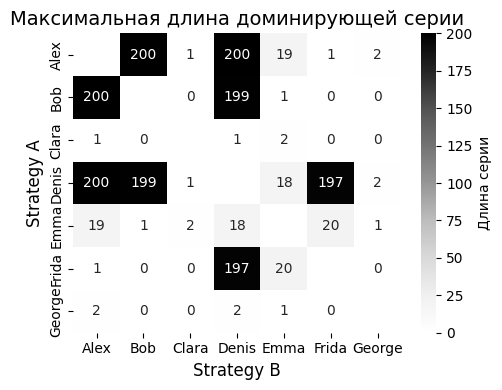

In [50]:
plt.figure(figsize=(5, 4))
sns.heatmap(df_dominance, annot=True, fmt=".0f", cmap="Greys", cbar_kws={'label': 'Длина серии'})
plt.title("Максимальная длина доминирующей серии", fontsize=14)
plt.xlabel("Strategy B", fontsize=12)
plt.ylabel("Strategy A", fontsize=12)
plt.tight_layout()
plt.show()


In [51]:
total_scores = df.groupby("Strategy_A")["A_Score"].sum().sort_values(ascending=False)
print("Суммарные очки каждой стратегии:")
print(total_scores)

print("\nСредние очки за игру:")
avg_scores = df.groupby("Strategy_A")["A_Score"].mean().sort_values(ascending=False)
print(avg_scores)

print("\nМаксимальная доминирующая серия для каждой стратегии:")
max_dom = df.groupby("Strategy_A")["Max_Dom_Series"].max().sort_values(ascending=False)
print(max_dom)

Суммарные очки каждой стратегии:
Strategy_A
Frida     3909
Alex      3576
George    3051
Clara     3037
Denis     2867
Bob       2373
Emma      1927
Name: A_Score, dtype: int64

Средние очки за игру:
Strategy_A
Frida     651.500000
Alex      596.000000
George    508.500000
Clara     506.166667
Denis     477.833333
Bob       395.500000
Emma      321.166667
Name: A_Score, dtype: float64

Максимальная доминирующая серия для каждой стратегии:
Strategy_A
Alex      200
Bob       200
Denis     200
Frida     197
Emma       20
Clara       2
George      2
Name: Max_Dom_Series, dtype: int64
